In [1]:
!pip install qiskit
!pip install pylatexenc

# Transpile your Circuit

To execute your circuit on a quantum device, you need to transpile your circuit. The transpilation process takes into account multiple different aspects to bring your circuit on to the underlying architecture. This one function takes care of gate translation, mapping and routing, as well as circuit optimization. In this tak we will have a closer look on how to change the default parameters of the transpilation fucntion in order to play with the circuit a bit more. We will see how the circuit changes with repect to the arguments we give to the transpile function. However, our first taks is again to define a quantum circuit which we want to execute on hardware.

In [2]:
from qiskit import QuantumCircuit, transpile
from math import pi

In [3]:
qc = QuantumCircuit(7)

qc.h(range(7))
qc.s([1, 3, 5])
qc.rx(pi/3, 0)
qc.rx(-pi/3, 0)     # cancels at higher optimization levels
qc.t(2)
qc.tdg(2)           # cancels
qc.barrier()

qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)
qc.cx(3, 4)
qc.cz(5, 6)
qc.barrier()

qc.ccx(1, 3, 5)     # multi-controlled (unrolling/templates)
qc.cx(0, 6)         # long-range; routing will add SWAPs on constrained coupling maps
qc.barrier()

qc.swap(2, 3)
qc.swap(2, 3)       # back-to-back SWAPs -> cancels
qc.rz(pi/5, 4); qc.h(4); qc.rz(pi/7, 4); qc.h(4)  # H-RZ-H -> RX (basis-change opportunity)
qc.cx(4, 5)
qc.cx(4, 5)         # duplicate CX pair -> cancels without barriers
qc.barrier()

qc.sx(6)
qc.rx(pi/9, 6)
qc.rz(-pi/9, 6)



Maybe a small note here: The circuit has no particular meaning we just use it for now to highlight some structures within the circuit. But first of all let's print it out so that we can have a better look on what's going on.

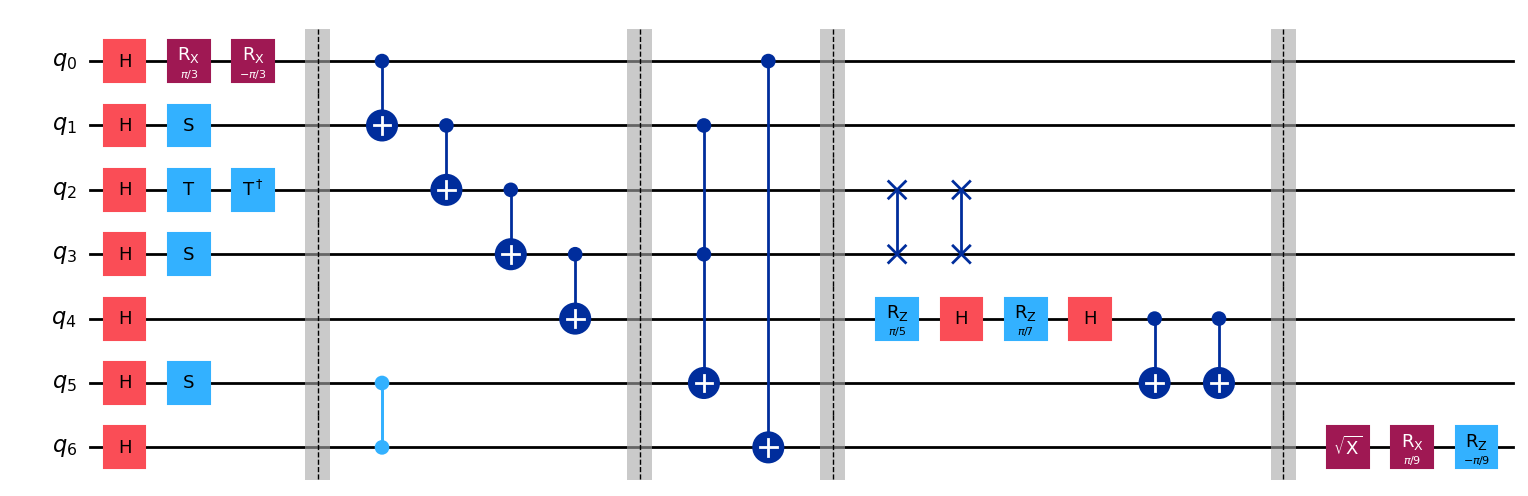

In [4]:
qc.draw('mpl')

Now we had a small loook at the circuit and it does directly what the code does. Now we need to "transpile" it. Transpilation is a process (compiler pass) in quantum computing which takes the circuit we want to execute and makes it ready for a specific device. A lot of different smaller passes are happening within the bigger picture and we will take a look at a few of those steps. However let's first transpile the circuit and print it again to analyze what has changed.

In [5]:
qc_transpiled = transpile(qc)

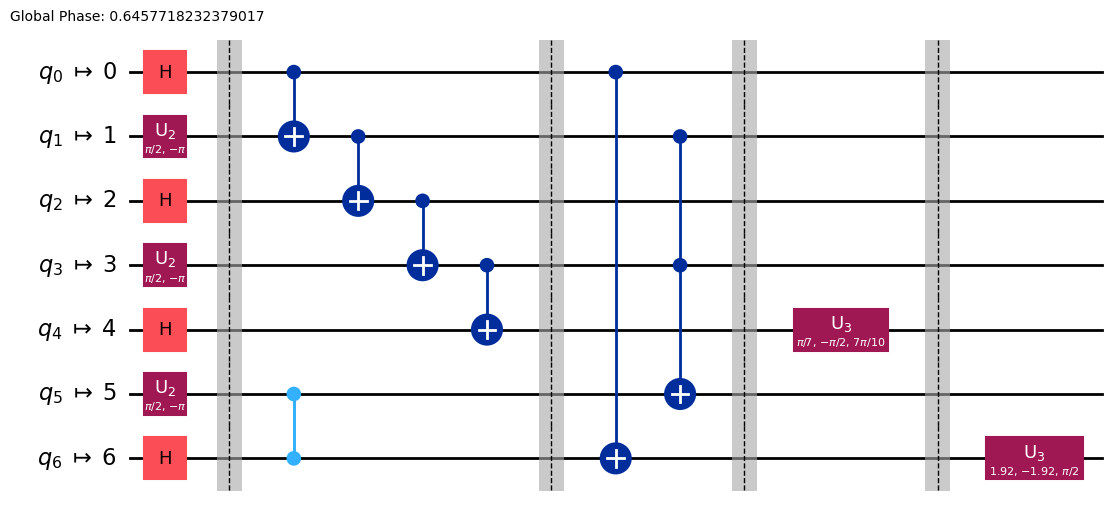

In [6]:
qc_transpiled.draw('mpl')

As we can see the circuit changed drastically. Some gates canceled out and others got moved or gates were merged into one. This is happening because the transpile function is using optimization methods. If we don't want to optimize anything we can set the optimization level to 0.

In [7]:
qc_transpiled_level_zero = transpile(qc, optimization_level=0)

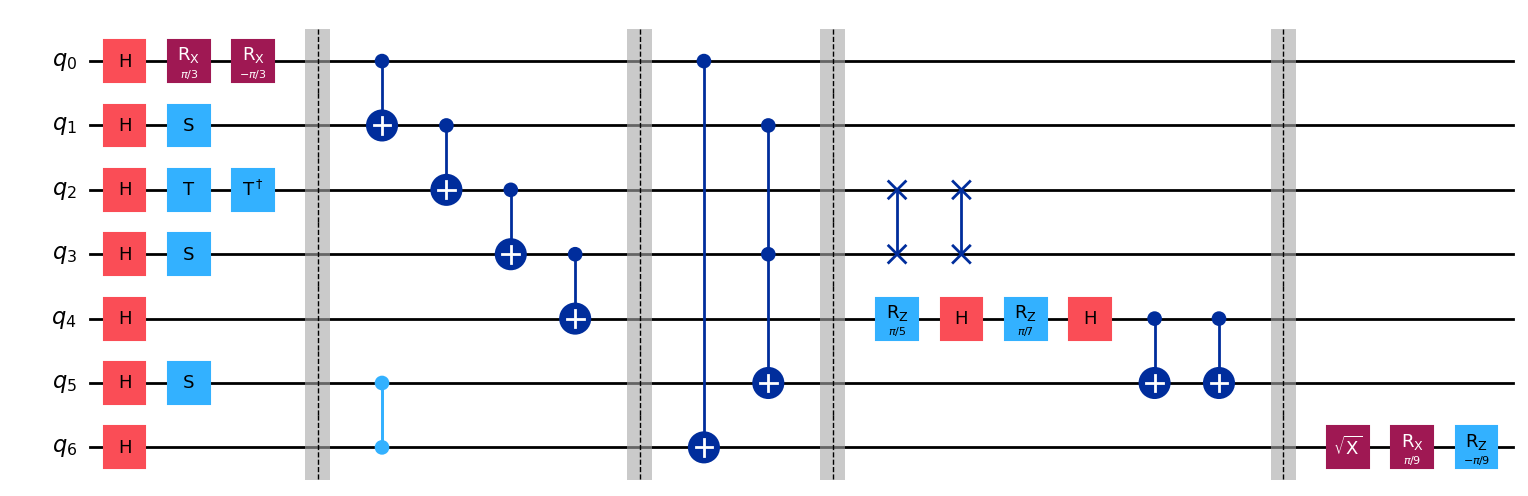

In [8]:
qc_transpiled_level_zero.draw('mpl')

There are optimization levels 0,1,2,3 and each of them is a bit different. So if you have any Circuit then play aorunf with the transpilation states.

# Coupling Map

IBM deals with Superconducting devices. And these devices have a set connectivity between qubits. 

In [34]:
from qiskit.transpiler import CouplingMap

# Define your bidirectional edges
edges = [
    (0, 1), (1, 0),
    (1, 2), (2, 1),
    (1, 3), (3, 1),
    (3, 4), (4, 3),
    (4,5),(5,4),
    (4,6),(6,4)
]

cm = CouplingMap(edges)



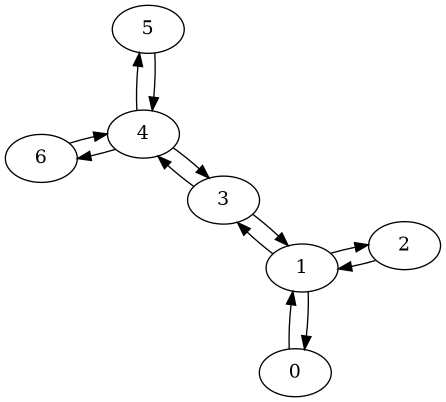

In [36]:
cm.draw() #I needed to install graphviz for that. 
#If you dont want to do that just take pen and paper and write the nodes and their edges to see how the architecture looks like

Imagine having this kind of architecture here for our circuit above. Now we want to transpile our circuit with this kind of architecture in mind. So let's insert it and see how the circuit changes.

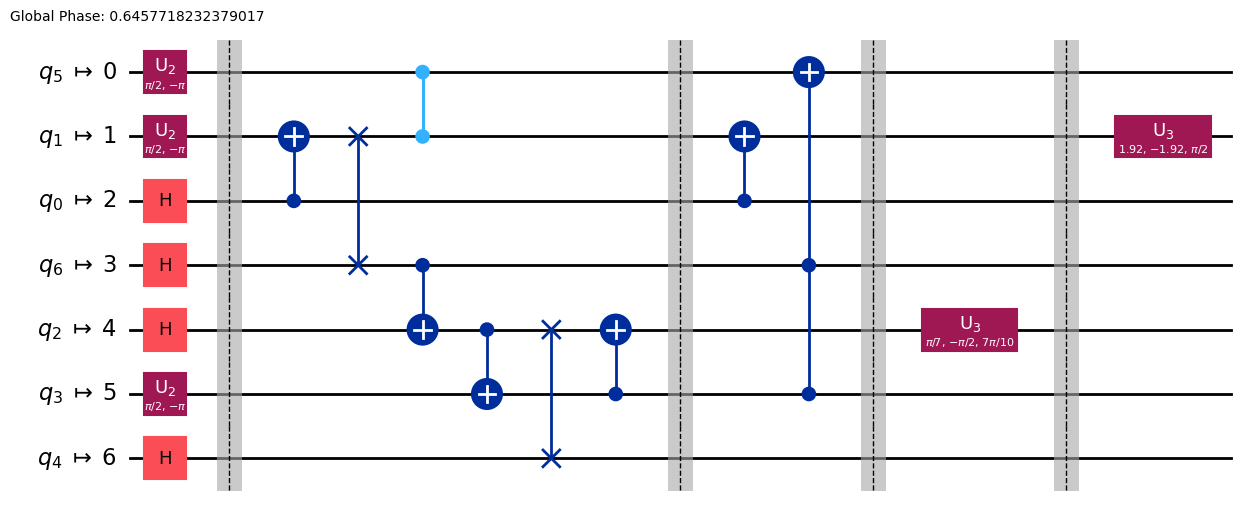

In [10]:
transpile_coupling_map_circuit = transpile(qc, coupling_map = cm)
transpile_coupling_map_circuit.draw('mpl')

Notice how on the left that the arrangement from physical to logical qubit changes and we insert more swaps.

## First Task

Try to execute the cell above multiple times and write down what changes.

In [11]:
#######Your Solution here####### if you want to use Markdown in this cell press ESC and then M, writing it down as python command ist also fine :D

# Native Gate Set

Actual devices can be very limited in their gate set. However sometimes we also want to test our theory. The Clifford + T gate set actually forms a universal set of gates. And we want to apply this set of gates to the circuit.

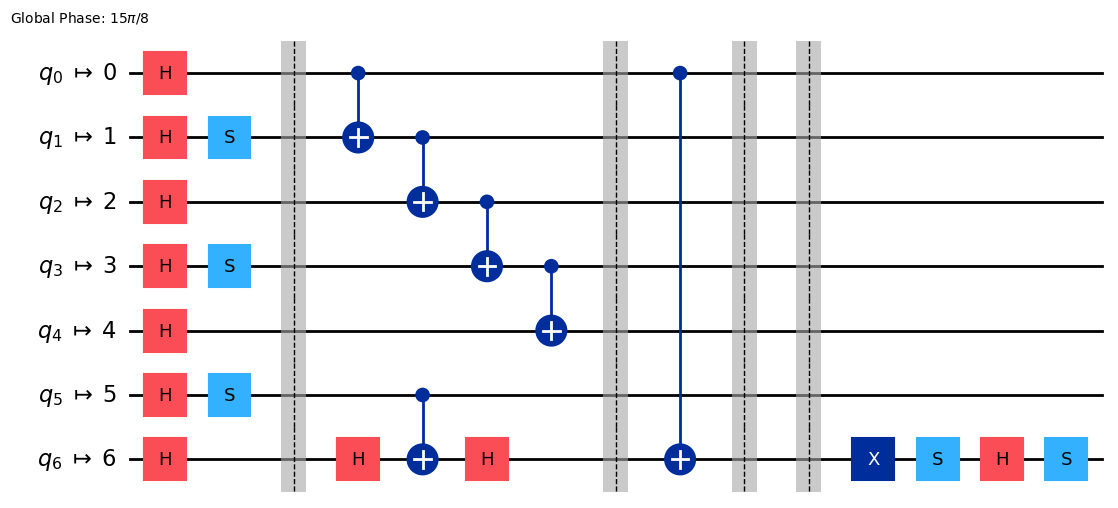

In [20]:
bg = [
    "x", "y", "z",
    "h",
    "s", "sdg",
    "t", "tdg",
    "cx",
]

transpile_basis_gates = transpile(qc,basis_gates=bg, optimization_level=3, approximation_degree=0.7)
transpile_basis_gates.draw('mpl')

Okay I just want to mention a few things here. So we just used a different gate set. And I had to set an approximation factor so the circuit we got just apporximated what the original circuit was doing. This is sometimes important as not all gate sets are optimal in the sense that we can only approximate some gates up to some degree.

# Task 1

Find out the gate set for the IBM Heron device and compile the circuit with the gate set. Additionally, use the coupling map from above and try out both the new gate set and connectivity

In [ ]:
#Your Solution

# Task 2

Find out the gate set for neutral atom device use the transpile function on the circuit and compare it to the other circuit. What is the difference in depth? Do we need to care about the connecitivy in neutral atom devices?

In [21]:
#Your Solution

# Task 3

This should be more like a smaller 'fun' task. Try to use all the things you learned and maybe some other parameters of the transpile function to compile the Quantum Fourier Transform below in a way to minimize the circuit depth. 

Once you tried everything to minimize the circuit depth try everything you learned to macimize the size as well. For that it's fine if you don't draw the circuit but maybe print out the depth of the circuit. You can find on how to do this on the IBM Qsikis Learning materials which are provided on the Qiskit Documentation


In [37]:
from qiskit.circuit.library import QFT

# n-qubit QFT
n = 5
qft_circ = QFT(num_qubits=n, do_swaps=True, approximation_degree=0.0) # Yes it will be depracted but for now is fine :D

/tmp/ipykernel_6481/2515031340.py:5: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_circ = QFT(num_qubits=n, do_swaps=True, approximation_degree=0.0) # Yes it will be depracted but for now is fine :D
